<a href="https://colab.research.google.com/github/Venkatesh397g/sample-works/blob/main/Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [ ]:
df1=pd.read_csv('college_1.csv')
df2=pd.read_csv('college_2.csv')
df=pd.concat([df1,df2], ignore_index=True)
df.fillna(0,inplace=True)
df

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [61]:
Exceeded_expectations = df[df['CodeKata Score']>15000]
Exceeded_expectations.to_csv('Exceeded_expectations.csv')

In [60]:
Reached_expectations= df[df['CodeKata Score'].between(10000,15000)]
Reached_expectations.to_csv('Reached_expectations.csv')

In [59]:
Needs_Improvement= df[df['CodeKata Score'].between(7000,10000)]
Needs_Improvement.to_csv('Needs_Improvement.csv')

In [58]:
Unsatisfactory= df[df['CodeKata Score'] < 7000]
Unsatisfactory.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [62]:
print('Average of previous week geekions : ',df['Previous Geekions'].mean())
print('Average of this week geekions : ',df['CodeKata Score'].mean())

Average of previous week geekions :  3842.3529411764707
Average of this week geekions :  4051.764705882353


In [63]:
#bar plot

data=pd.DataFrame({'Columns': ['Previous Geekions','Codekata Score'],'Values':[df['Previous Geekions'].mean(),df['CodeKata Score'].mean()]})
px.bar(data,x='Columns',y='Values',color='Columns',title='Average of previous week geekions vs this week geekions ',text_auto=True)

###### No of students participated 

In [64]:
print('No of students participated :',df['Name'].count())

No of students participated : 119


###### #Average completion of python course or my_sql or python english or computational thinking

In [67]:
Completion=df.loc[(df['python']==100.0) | (df['mysql']==100.0) | (df['python_en']==100.0) | (df['computational_thinking']==100.0)]
print('Average completion of python course or my_sql or python english or computational thinking : ',((len(Completion.index)/len(df.index))*100),'%')

Average completion of python course or my_sql or python english or computational thinking :  38.655462184873954 %


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [68]:
df=df.sort_values(by=['Rising'], ascending=[False])
df.head(3)
#df[df.columns[0]].head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [69]:
df=df.sort_values(by=['Previous Geekions'], ascending=[False])
#df.head(3)
df[df.columns[0]].head(3)

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

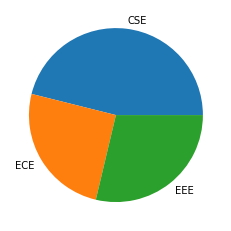

In [70]:
g=df.groupby('Department')['CodeKata Score'].mean()
dept=['CSE','ECE','EEE']
plt.pie(g,labels=dept)
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

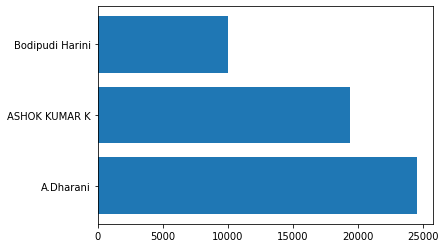

In [71]:
#topper from each dept
df["rank"] = df.groupby("Department")["CodeKata Score"].rank(method="dense", ascending=False)
df.set_index(['rank'],inplace=True)
df=df.sort_values(by=['rank'])
x=df[df.index==1]['Name']
y=df[df.index==1]['CodeKata Score']
plt.barh(x,y)
plt.show()

In [72]:
# dept wise toppers

#Computer Science and Engineering

data=df[['Name','CodeKata Score']].where(df['Department']=='Computer Science and Engineering')
csc_topper=data.nlargest(5,"CodeKata Score")
fig = px.bar(csc_topper, x="Name",y='CodeKata Score',title="Department wise toppers - Computer Science and Engineering")
fig.show()

In [73]:
#Electronics and Communication Engineering

data=df[['Name','CodeKata Score']].where(df['Department']=='Electronics and Communication Engineering')
ece_topper=df1.nlargest(5,"CodeKata Score")
fig = px.bar(ece_topper, x="Name",y='CodeKata Score',title="Department wise toppers - Electronics and Communication Engineering")
fig.show()

In [74]:
#Electronics and Electrical Engineering

data=df[['Name','CodeKata Score']].where(df['Department']=='Electronics and Electrical Engineering')
eee_topper=df1.nlargest(5,"CodeKata Score")
fig = px.bar(eee_topper, x="Name",y='CodeKata Score',title="Department wise toppers - Electronics and Electrical Engineering")
fig.show()